In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import cdist

In [47]:
data=pd.read_csv('C:\\Users\\dkannan3\\Documents\\My Courses\\GL AI ML\\Lab\\Unsupervised Learning  Project-1-Dec-27-2019\\cars-dataset.csv')
data.head(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


# 1) EDA & Pre-processing

In [5]:
# Shape

data.shape

(398, 8)

In [6]:
# Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [8]:
# Describe

data.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [25]:
# Data Types

data.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [48]:
# Finding the non-numeric data

data[data['hp']=='?']

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [49]:
# Replacing '?' with '0'

data.replace(to_replace='?',  value='0', inplace=True)

In [53]:
# Typecasting hp column to int data type

data['hp']=data['hp'].astype(int)

In [54]:
# Data Types

data.dtypes

car name     object
cyl           int64
disp        float64
hp            int32
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [55]:
# Describe

data.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


# 2) Correlation

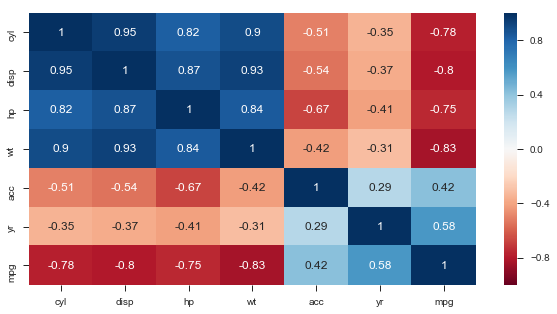

In [63]:
# Correlation

corr=data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,cmap='RdBu',annot=True,vmin=-1, vmax=1)

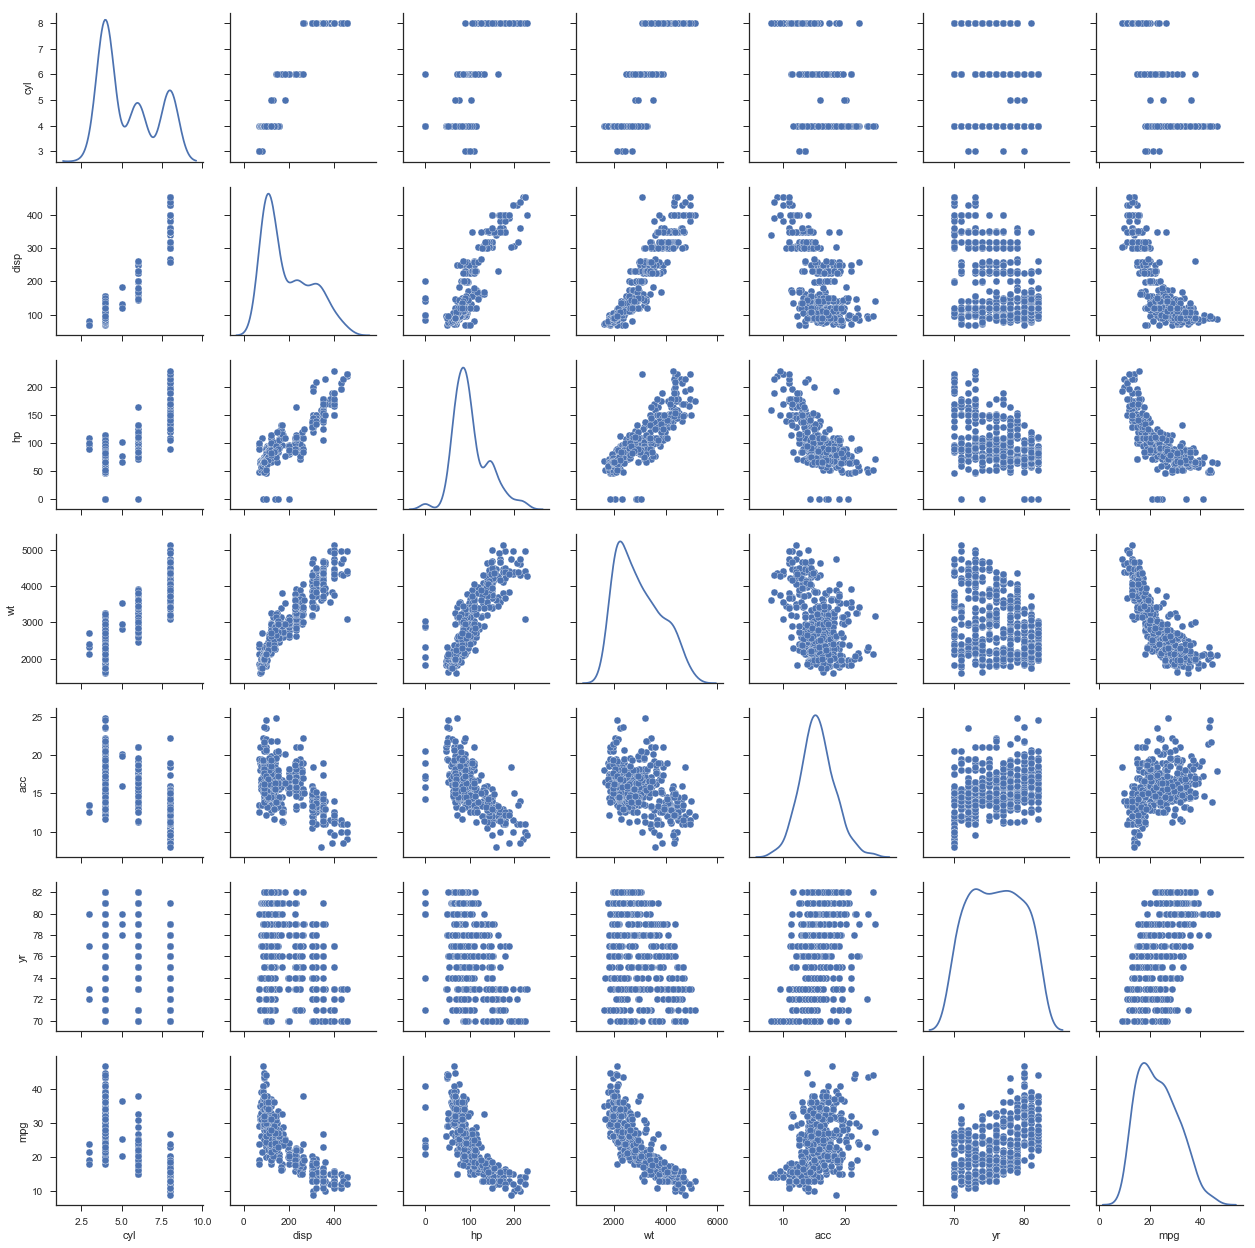

In [60]:
# Pair plot without hue

sns.set(style="ticks", color_codes=True)
pp=sns.pairplot(data, diag_kind="kde")

C:\Users\DKANNAN3\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\DKANNAN3\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\DKANNAN3\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DKANNAN3\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


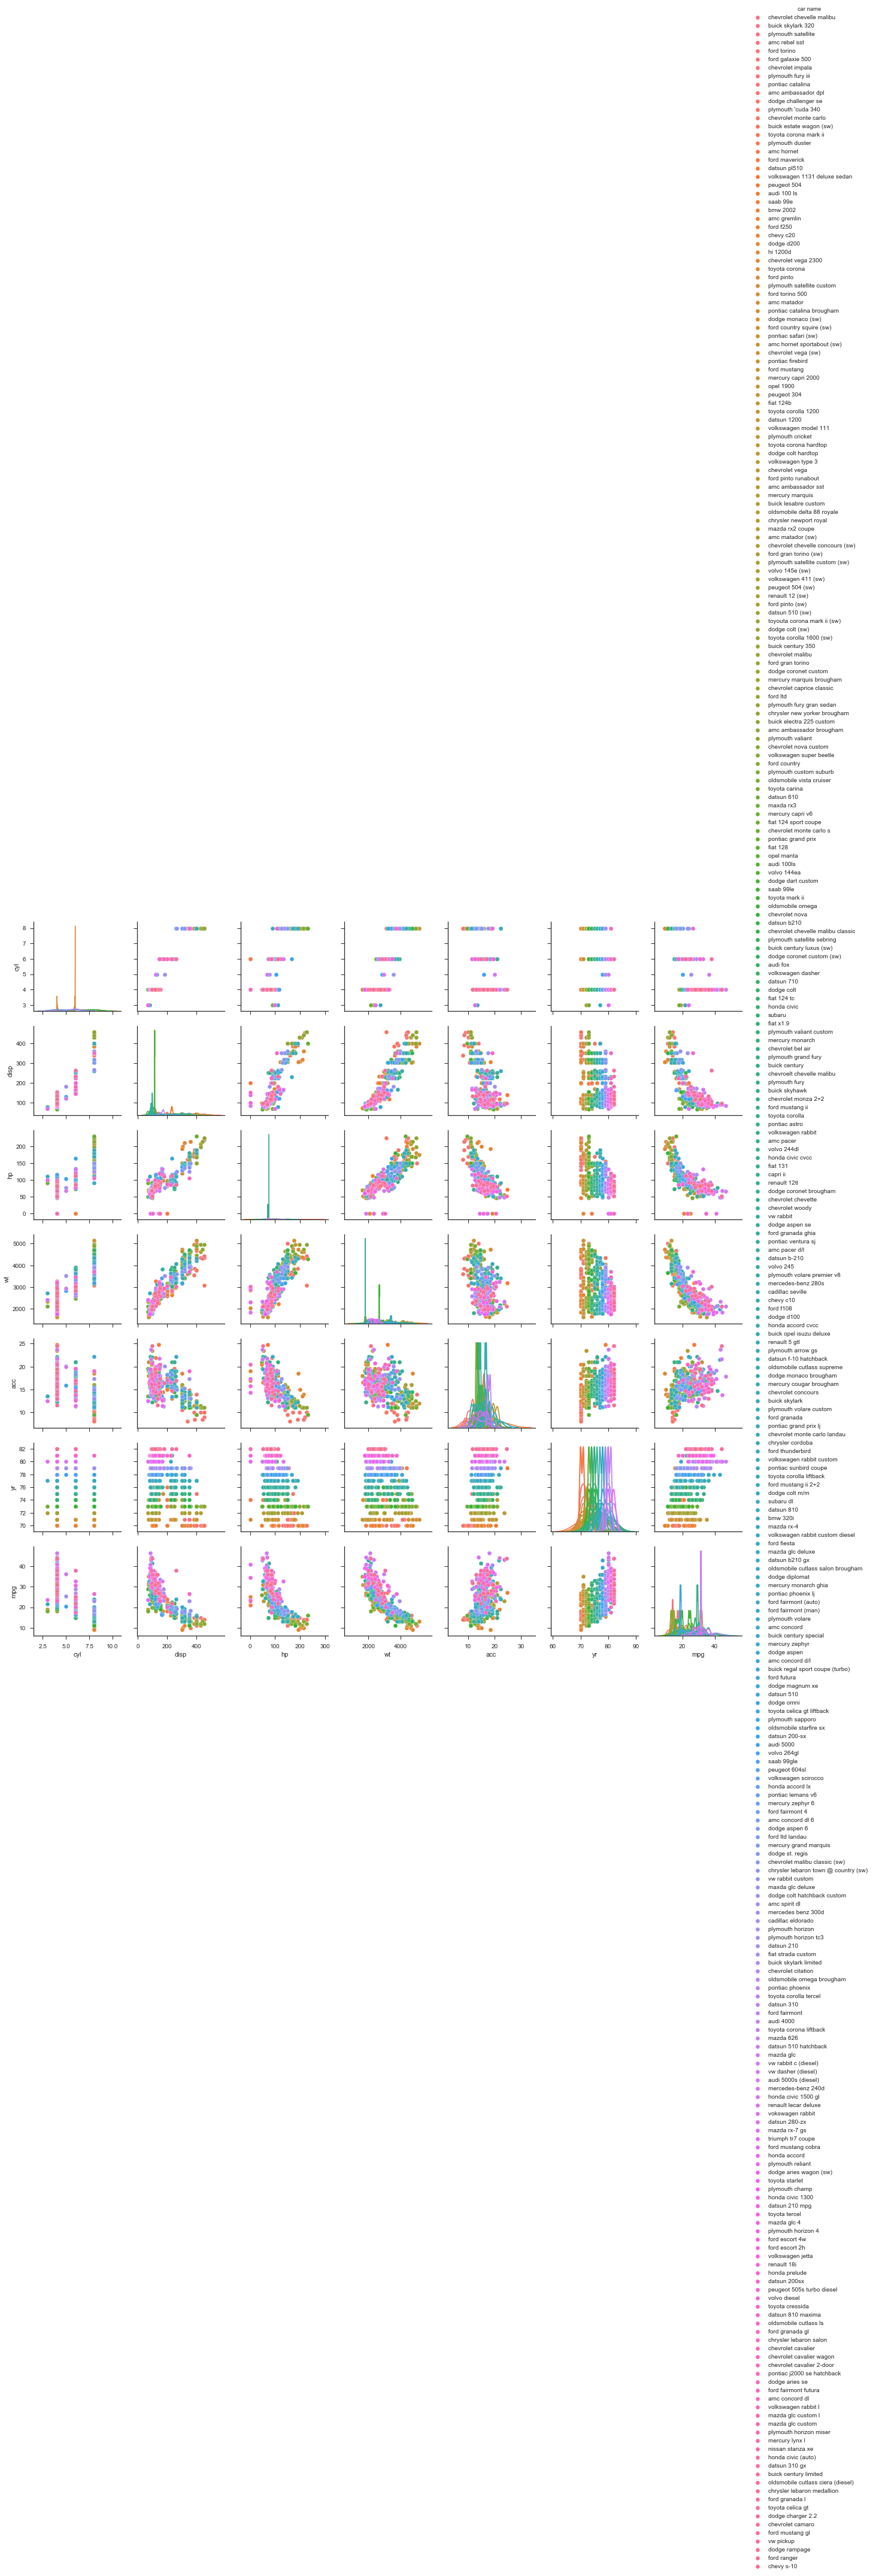

In [59]:
# Pair plot with hue

sns.set(style="ticks", color_codes=True)
pp=sns.pairplot(data, diag_kind="kde", hue='car name')

# 3) K Means

In [65]:
data_k=data.drop(['car name'], axis=1)

In [66]:
data_k.head(5)

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0


In [68]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_k)
    distortions.append(
        sum(np.min(cdist(data_k, kmeanModel.cluster_centers_, 'euclidean'), axis=1))**2 / data.shape[0])

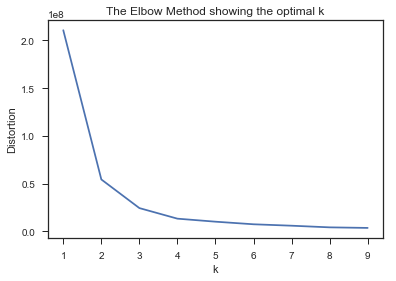

In [69]:
# Plot the elbow

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [70]:
# Optimal number of clusters in the data is 3

kmeans = KMeans(n_clusters=3)

In [71]:
kmeans.fit(data_k)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [72]:
clusters = kmeans.labels_
clusters

array([2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2,

In [73]:
data_k['clusters']=clusters
data_k.head(5)

,cyl,disp,hp,wt,acc,yr,mpg,clusters
0,8,307.0,130,3504,12.0,70,18.0,2
1,8,350.0,165,3693,11.5,70,15.0,1
2,8,318.0,150,3436,11.0,70,18.0,2
3,8,304.0,150,3433,12.0,70,16.0,2
4,8,302.0,140,3449,10.5,70,17.0,2


In [74]:
grpby=data_k.groupby('clusters').mean()
grpby

,cyl,disp,hp,wt,acc,yr,mpg
clusters,,,,,,,
0,4.038462,106.953297,75.796703,2217.670330,16.358791,76.730769,29.751099
1,7.866667,344.144444,157.811111,4236.322222,13.463333,74.011111,14.635556
2,5.777778,210.674603,102.809524,3153.523810,15.929365,76.396825,20.848413


In [75]:
centroids=kmeans.cluster_centers_
centroids

array([[4.03846154e+00, 1.06953297e+02, 7.57967033e+01, 2.21767033e+03,
        1.63587912e+01, 7.67307692e+01, 2.97510989e+01],
       [7.86666667e+00, 3.44144444e+02, 1.57811111e+02, 4.23632222e+03,
        1.34633333e+01, 7.40111111e+01, 1.46355556e+01],
       [5.77777778e+00, 2.10674603e+02, 1.02809524e+02, 3.15352381e+03,
        1.59293651e+01, 7.63968254e+01, 2.08484127e+01]])

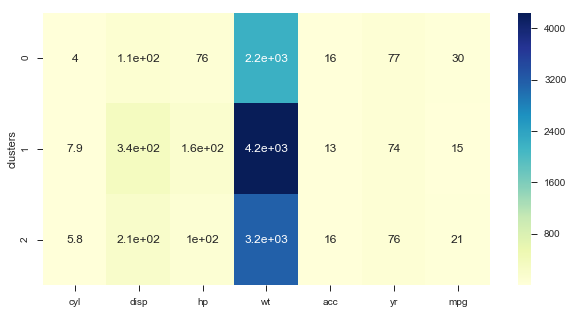

In [83]:
plt.figure(figsize=(10,5))
sns.heatmap(grpby,cmap='YlGnBu',annot=True)

In [85]:
data_k['car name']=data['car name']
data_k.head(10)

,cyl,disp,hp,wt,acc,yr,mpg,clusters,car name
0,8,307.0,130,3504,12.0,70,18.0,2,chevrolet chevelle malibu
1,8,350.0,165,3693,11.5,70,15.0,1,buick skylark 320
2,8,318.0,150,3436,11.0,70,18.0,2,plymouth satellite
3,8,304.0,150,3433,12.0,70,16.0,2,amc rebel sst
4,8,302.0,140,3449,10.5,70,17.0,2,ford torino
5,8,429.0,198,4341,10.0,70,15.0,1,ford galaxie 500
6,8,454.0,220,4354,9.0,70,14.0,1,chevrolet impala
7,8,440.0,215,4312,8.5,70,14.0,1,plymouth fury iii
8,8,455.0,225,4425,10.0,70,14.0,1,pontiac catalina
9,8,390.0,190,3850,8.5,70,15.0,1,amc ambassador dpl


In [143]:
data_cl0=data_k[data_k['clusters']==0]

In [144]:
data_cl1=data_k[data_k['clusters']==1]

In [145]:
data_cl2=data_k[data_k['clusters']==2]

In [108]:
data_cl0.shape

(182, 7)

In [109]:
data_cl1.shape

(90, 7)

In [110]:
data_cl2.shape

(126, 7)

# 4) Linear Regression

**Cluster 0**

In [146]:
data_cl0.drop(['clusters','car name'], axis=1, inplace=True)
x0=data_cl0.drop(['mpg'], axis=1)
y0=data_cl0['mpg']
x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, test_size=0.30 , random_state=5)
lr_cl0 = LinearRegression()
lr_cl0.fit(x0_train, y0_train)
print('Training Accuracy:')
print(lr_cl0.score(x0_train, y0_train))
print('Testing Accuracy:')
print(lr_cl0.score(x0_test, y0_test))

Training Accuracy:
0.7051796774019763
Testing Accuracy:
0.5518544062238822


C:\Users\DKANNAN3\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [147]:
print('Cluster 0 coefficients:')
pd.DataFrame(data=lr_cl0.coef_, index=x0_train.columns, columns=['coefficients'])

Cluster 0 coefficients:


,coefficients
cyl,4.375884
disp,-0.092260
hp,-0.015935
wt,-0.004632
acc,0.160652
yr,0.934208


**Cluster 1**

In [148]:
data_cl1.drop(['clusters','car name'], axis=1, inplace=True)
x1=data_cl1.drop(['mpg'], axis=1)
y1=data_cl1['mpg']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.30 , random_state=5)
lr_cl1 = LinearRegression()
lr_cl1.fit(x1_train, y1_train)
print('Training Accuracy:')
print(lr_cl1.score(x1_train, y1_train))
print('Testing Accuracy:')
print(lr_cl1.score(x1_test, y1_test))

Training Accuracy:
0.6114126233698873
Testing Accuracy:
0.6336820821463831


C:\Users\DKANNAN3\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [149]:
print('Cluster 1 coefficients:')
pd.DataFrame(data=lr_cl1.coef_, index=x1_train.columns, columns=['coefficients'])

Cluster 1 coefficients:


,coefficients
cyl,-0.594061
disp,0.013582
hp,-0.009952
wt,-0.002799
acc,-0.083557
yr,0.469273


**Cluster 2**

In [151]:
data_cl2.drop(['clusters','car name'], axis=1, inplace=True)
x2=data_cl2.drop(['mpg'], axis=1)
y2=data_cl2['mpg']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.30 , random_state=5)
lr_cl2 = LinearRegression()
lr_cl2.fit(x2_train, y2_train)
print('Training Accuracy:')
print(lr_cl2.score(x2_train, y2_train))
print('Testing Accuracy:')
print(lr_cl2.score(x2_test, y2_test))

Training Accuracy:
0.6388508554524095
Testing Accuracy:
0.432675255929878


C:\Users\DKANNAN3\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [153]:
print('Cluster 2 coefficients:')
pd.DataFrame(data=lr_cl2.coef_, index=x2_train.columns, columns=['coefficients'])

Cluster 2 coefficients:


,coefficients
cyl,0.519495
disp,-0.022748
hp,0.000558
wt,-0.004700
acc,0.218042
yr,0.422830
